The cross comparison method is proposed by Woz: https://supermemo.guru/wiki/Universal_metric_for_cross-comparison_of_spaced_repetition_algorithms#Algorithmic_contest:_SuperMemo_2_vs._SuperMemo_17

In [1]:
import pandas as pd
from pathlib import Path

dfs = []

for file in Path("./raw").glob("*.csv"):
    dfs.append(pd.read_csv(file))

df = pd.concat(dfs, ignore_index=True)
df.rename(columns={"R (SM17)": "R (SM-17)"}, inplace=True)
df.rename(columns={"R (SM16)": "R (SM-16)"}, inplace=True)
df.head()

,y,R (SM-16),R (SM-17),R (AVG),R (MOVING-AVG),R (FSRS-6-default),R (FSRSv3),R (FSRSv4),R (FSRS-4.5),R (FSRS-5),R (FSRS-6),R (ADVERSARIAL)
0,1,0.841,0.866,0.641176,0.613784,0.660,0.720,0.545,0.640,0.603,0.660,1.0
1,1,0.684,0.548,0.557143,0.640863,0.582,0.464,0.340,0.478,0.444,0.582,1.0
2,1,0.698,0.667,0.900000,0.665267,0.582,0.464,0.340,0.478,0.444,0.582,1.0
3,1,0.810,0.981,0.593333,0.707050,0.740,0.730,0.503,0.654,0.622,0.740,1.0
4,1,0.796,0.916,0.595000,0.578715,0.633,0.645,0.474,0.585,0.548,0.633,1.0


In [2]:
df.describe()

,y,R (SM-16),R (SM-17),R (AVG),R (MOVING-AVG),R (FSRS-6-default),R (FSRSv3),R (FSRSv4),R (FSRS-4.5),R (FSRS-5),R (FSRS-6),R (ADVERSARIAL)
count,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000,687662.000000
mean,0.869773,0.853300,0.885862,0.868532,0.864614,0.799649,0.833526,0.838677,0.845602,0.844404,0.855819,0.869766
std,0.336553,0.149112,0.130725,0.054881,0.086074,0.119795,0.168778,0.155693,0.136136,0.137310,0.096222,0.260204
min,0.000000,0.005000,0.000000,0.064286,0.134825,0.198000,0.000000,0.003000,0.027000,0.015000,0.207000,0.000000
25%,1.000000,0.820000,0.846000,0.837106,0.827587,0.734000,0.797000,0.795000,0.797000,0.796000,0.809000,0.900000
50%,1.000000,0.905000,0.914000,0.881227,0.881543,0.823000,0.887000,0.888000,0.886000,0.885000,0.876000,1.000000
75%,1.000000,0.945000,0.984000,0.902819,0.922229,0.889000,0.939000,0.942000,0.940000,0.940000,0.925000,1.000000
max,1.000000,0.999000,1.000000,0.996970,0.997495,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


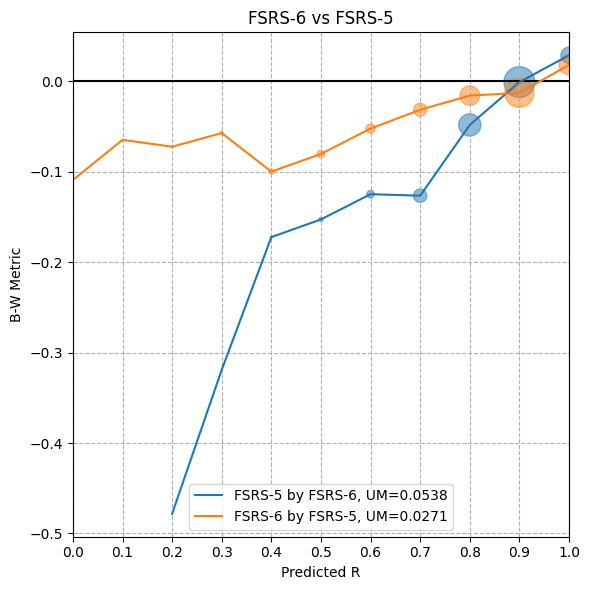

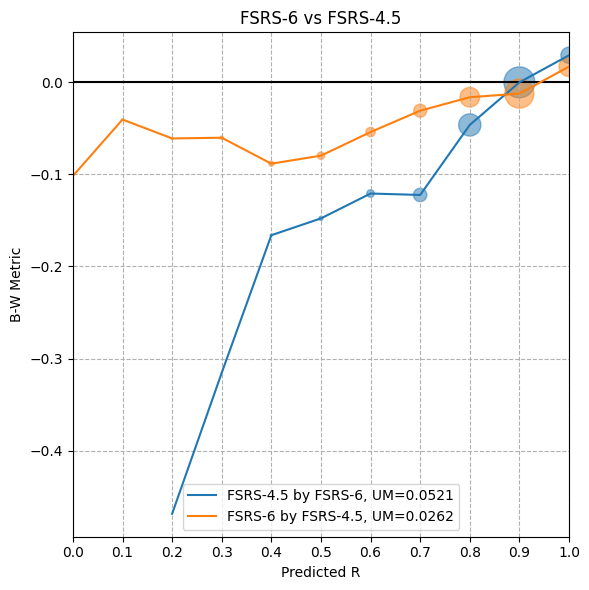

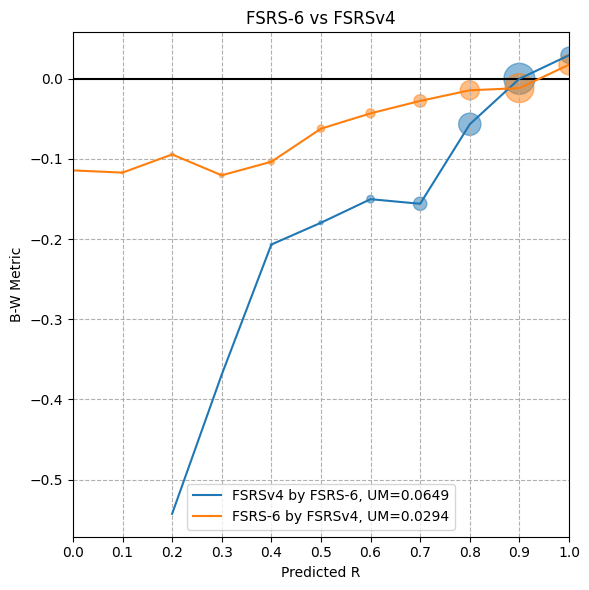

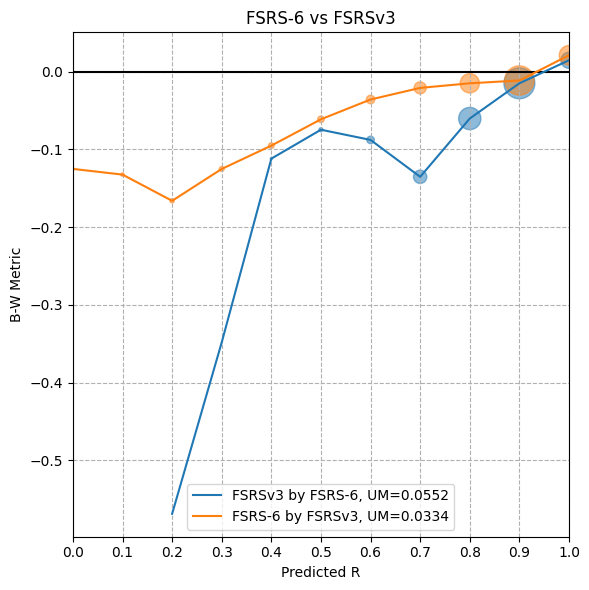

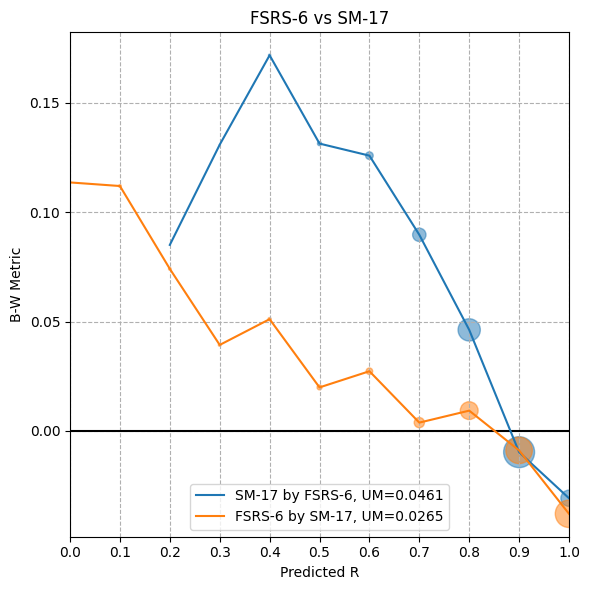

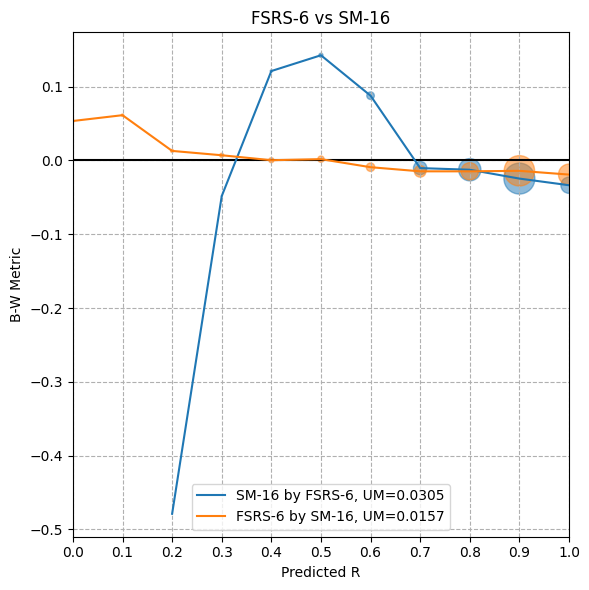

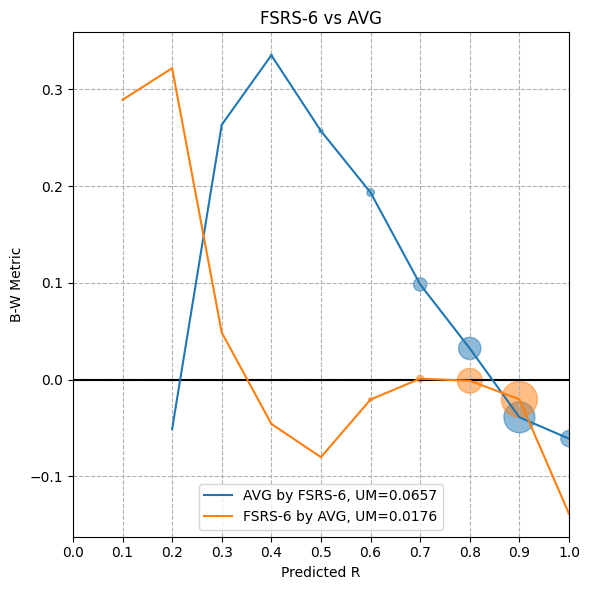

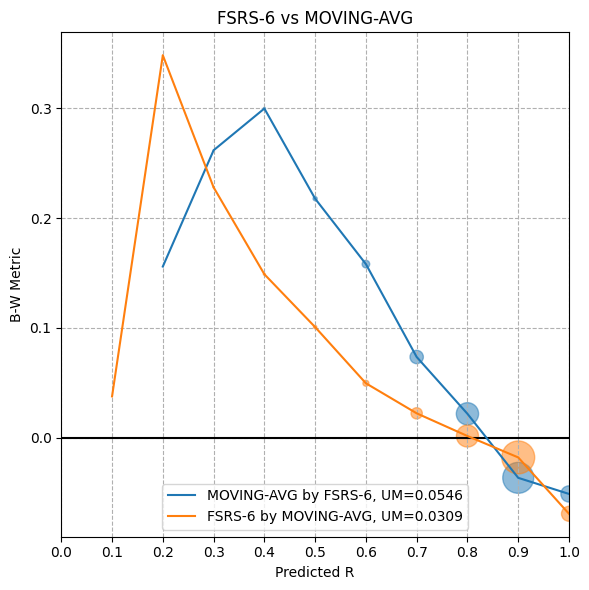

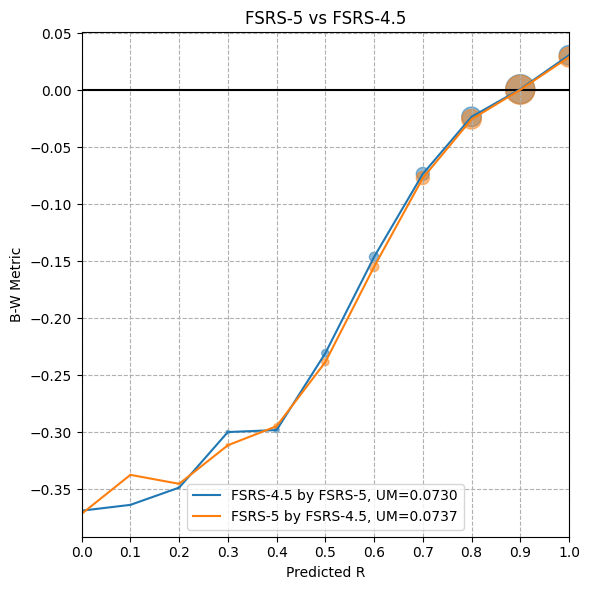

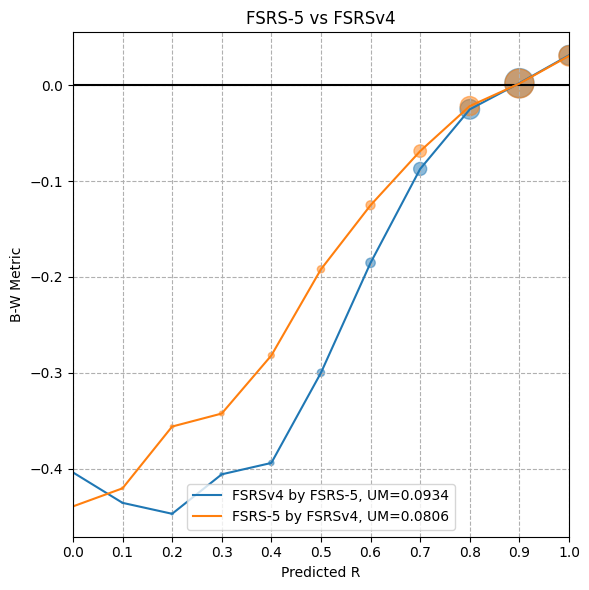

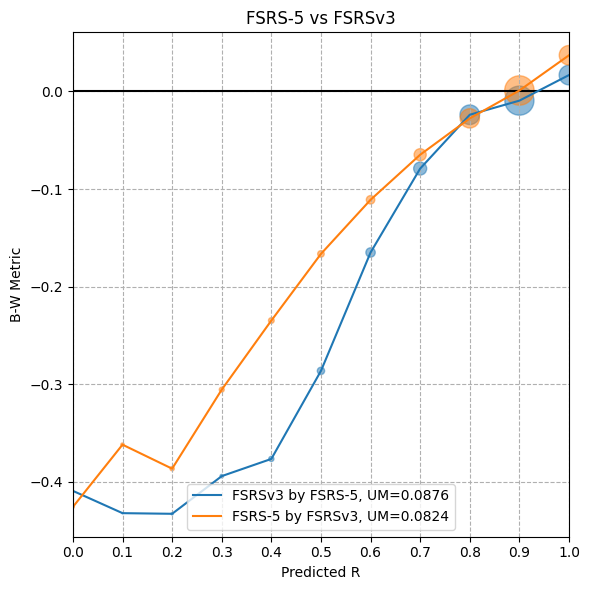

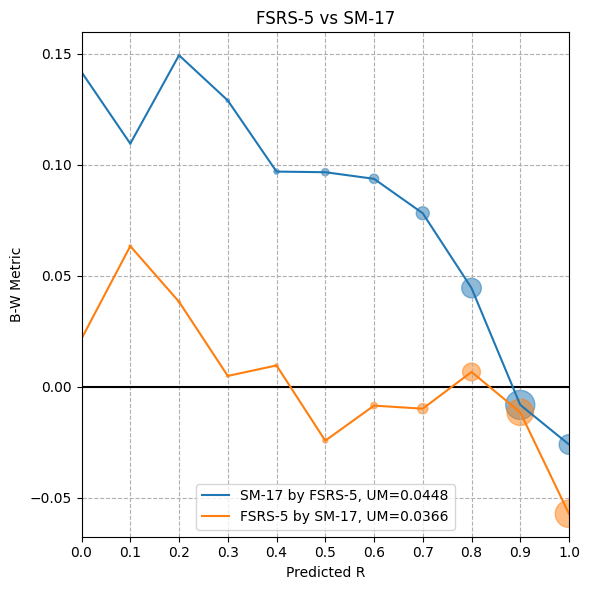

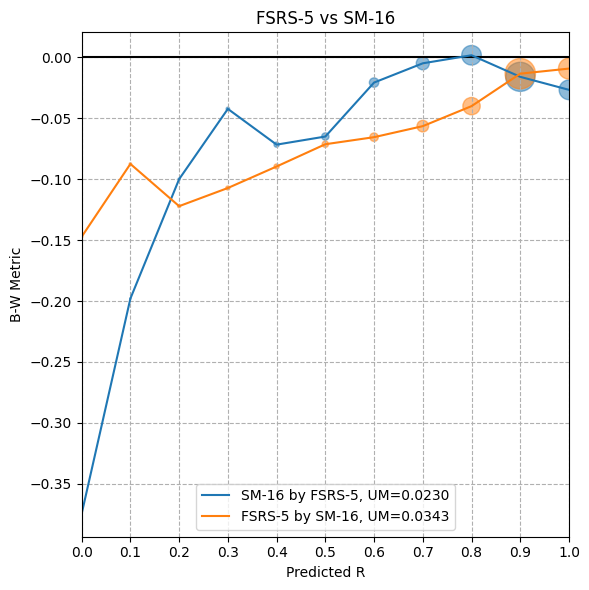

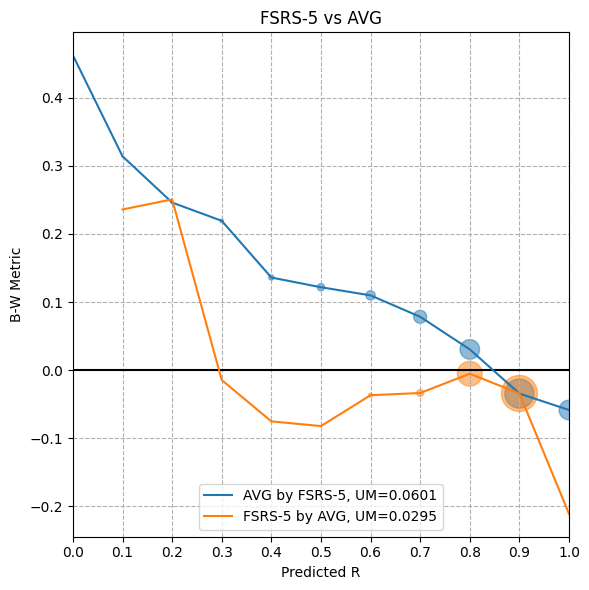

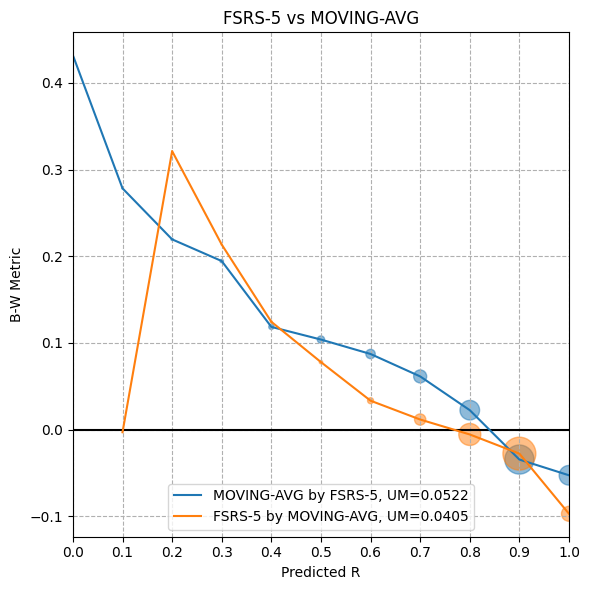

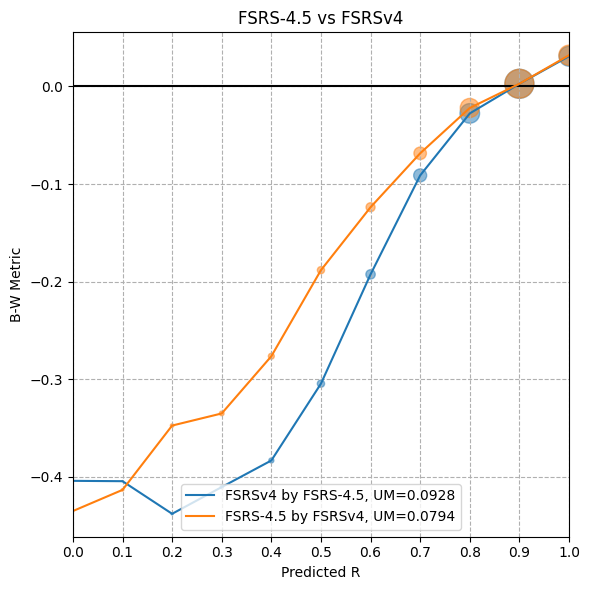

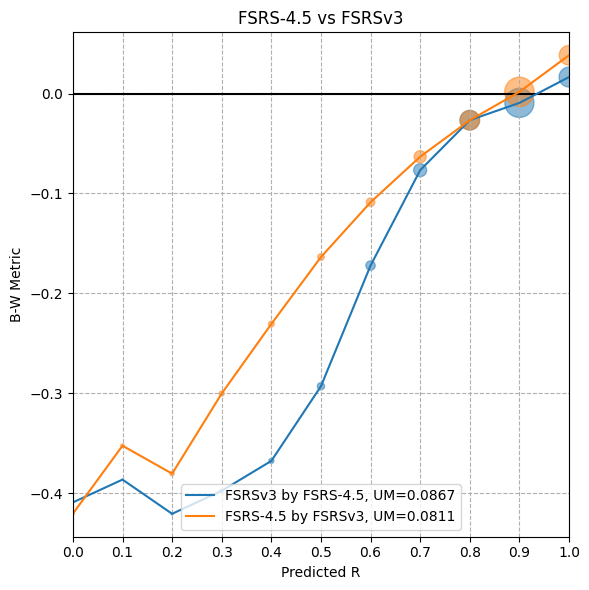

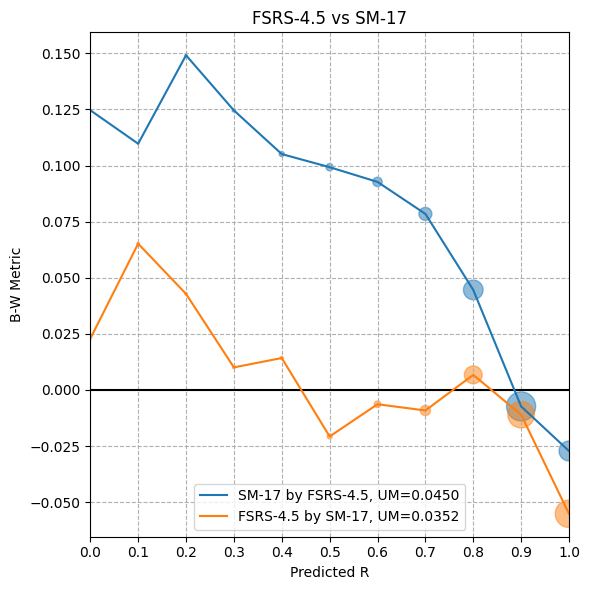

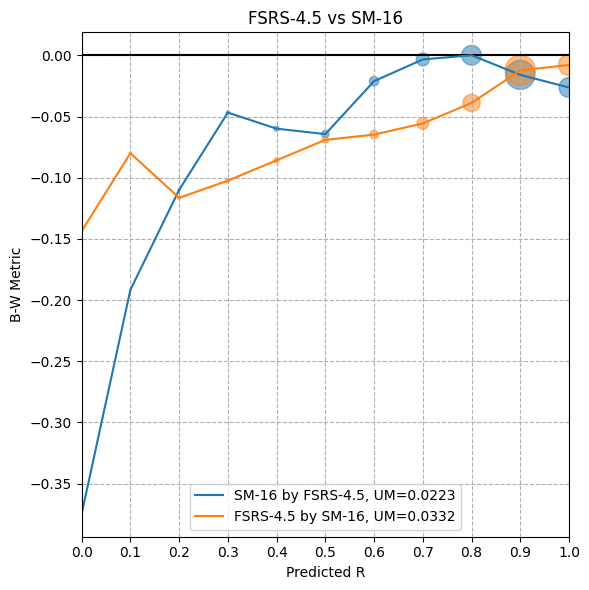

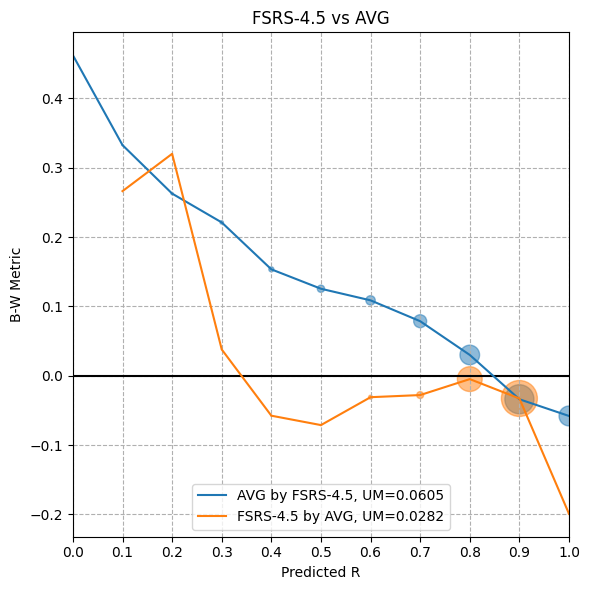

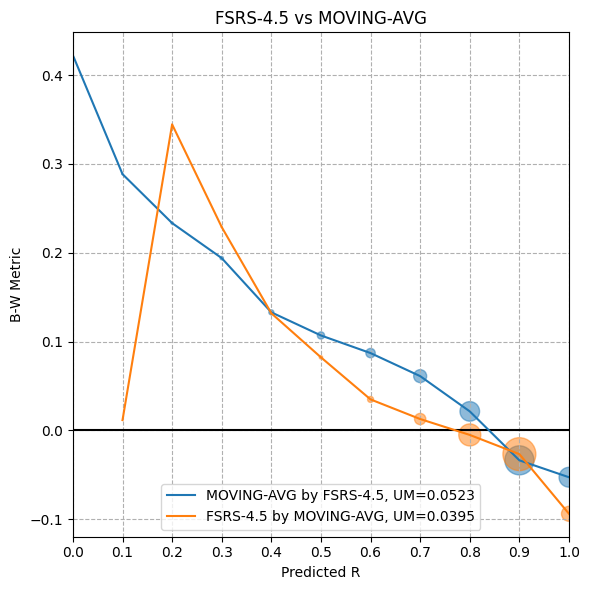

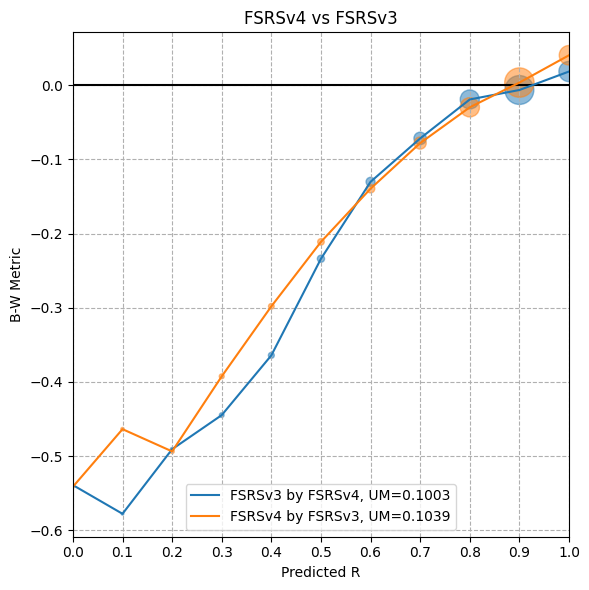

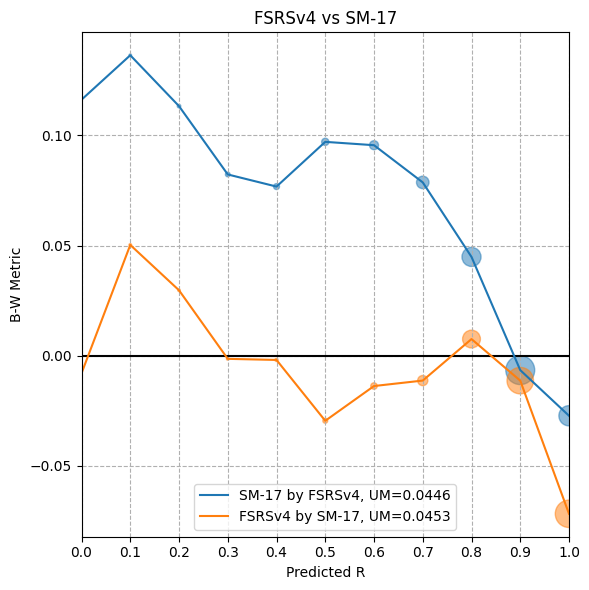

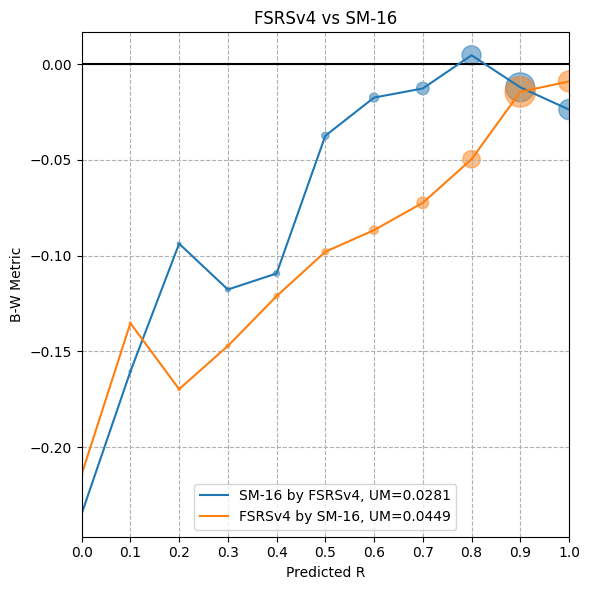

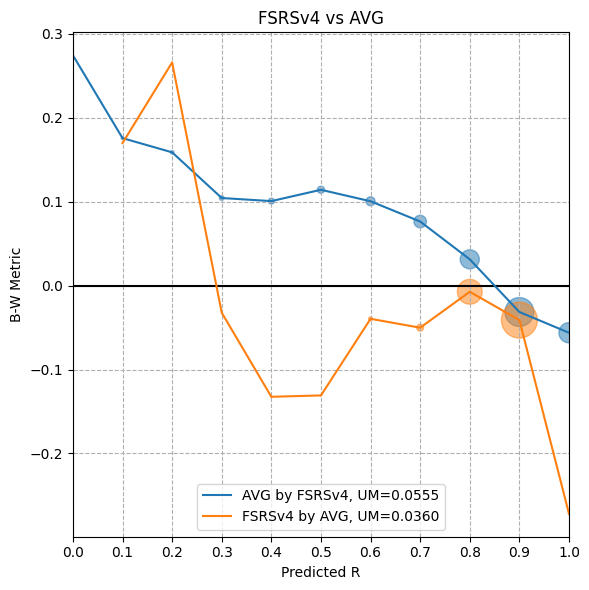

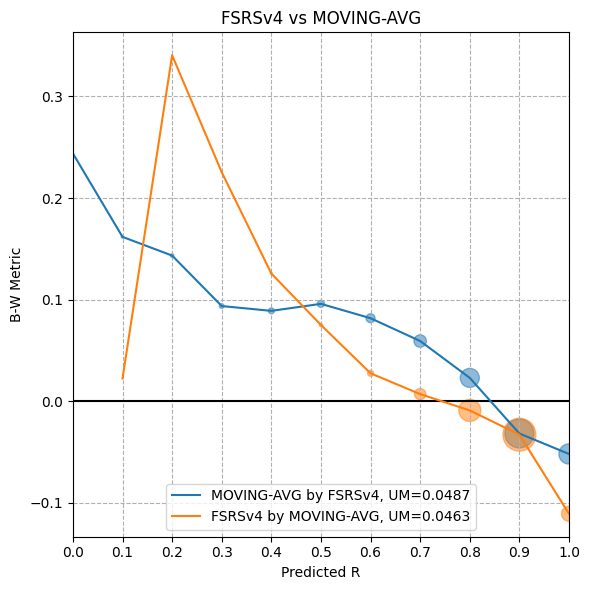

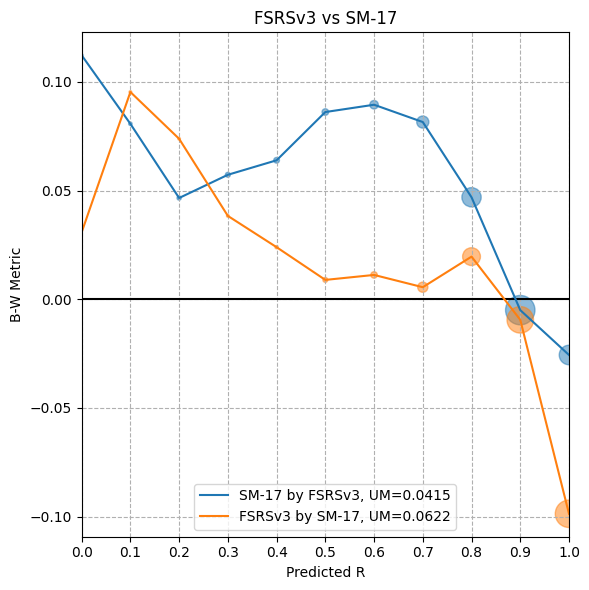

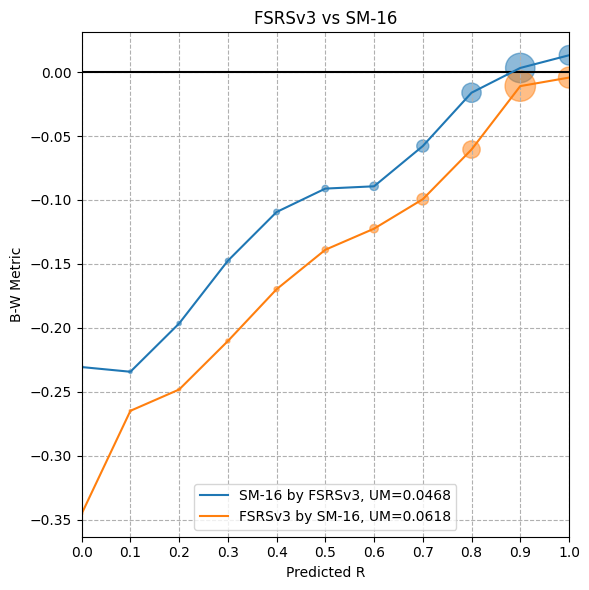

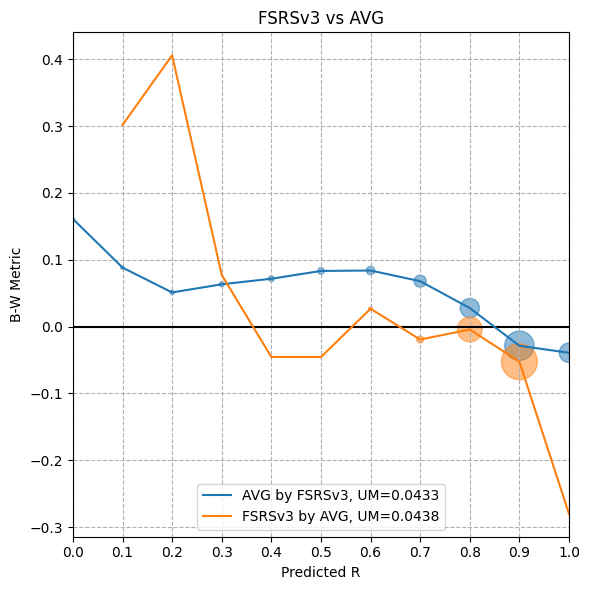

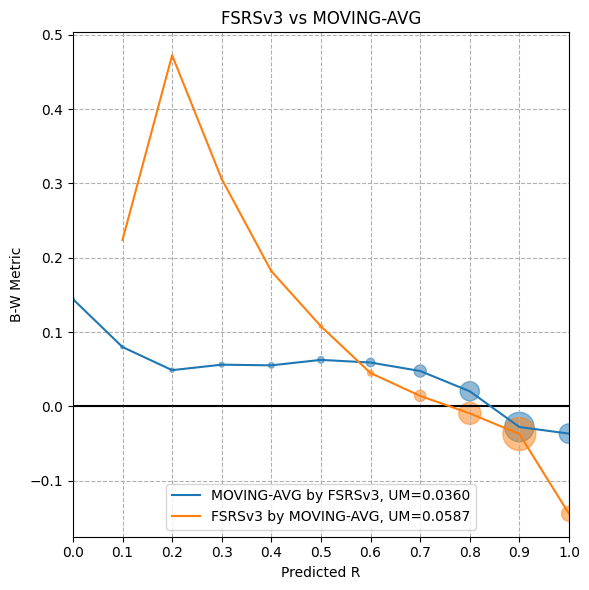

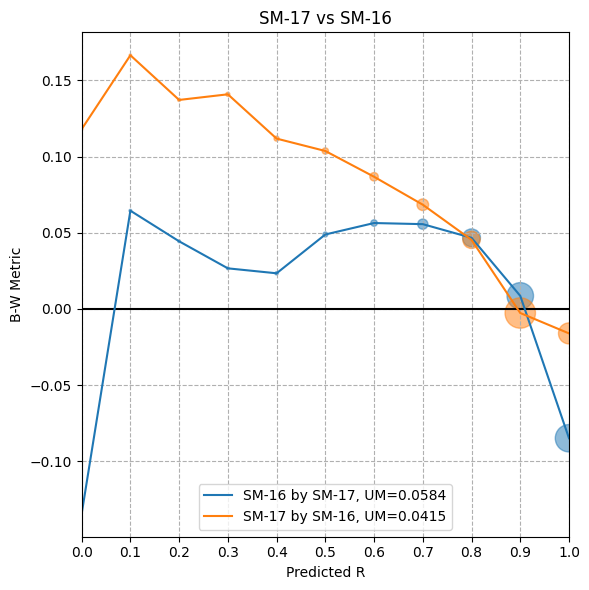

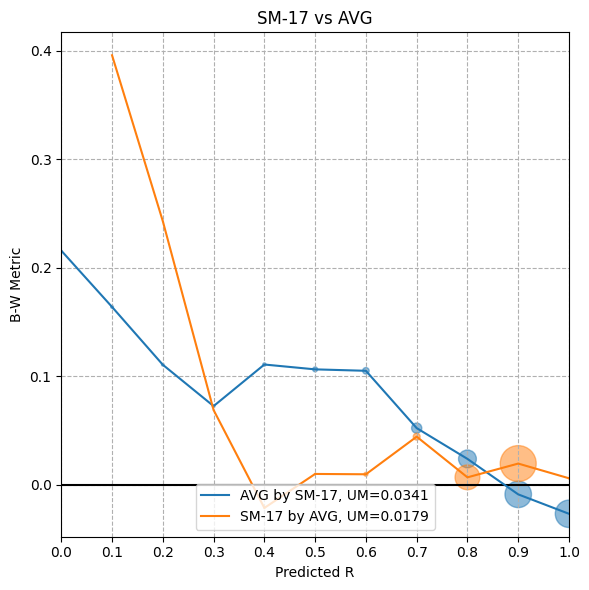

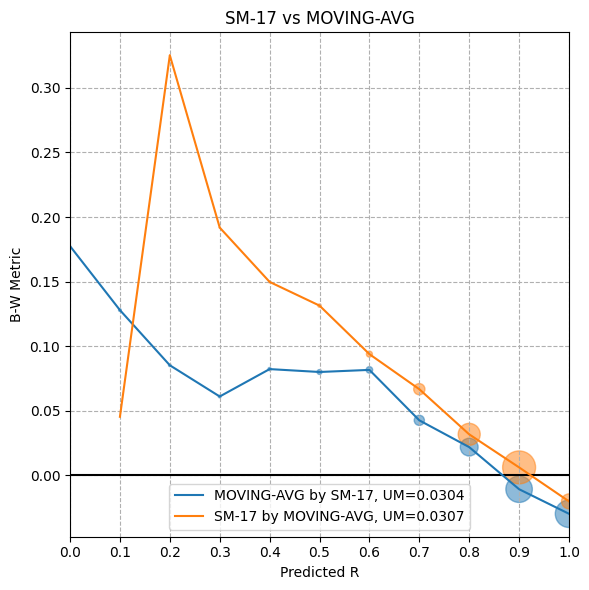

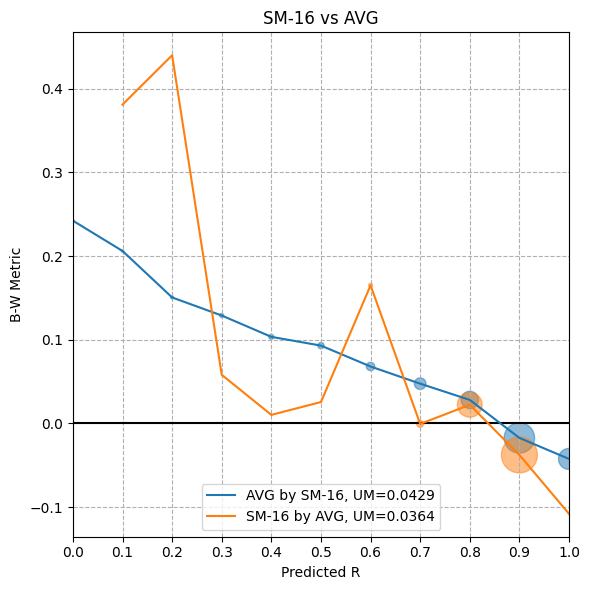

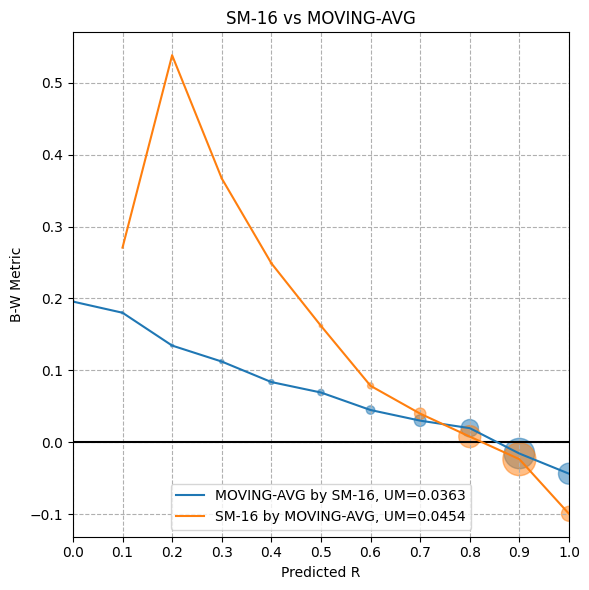

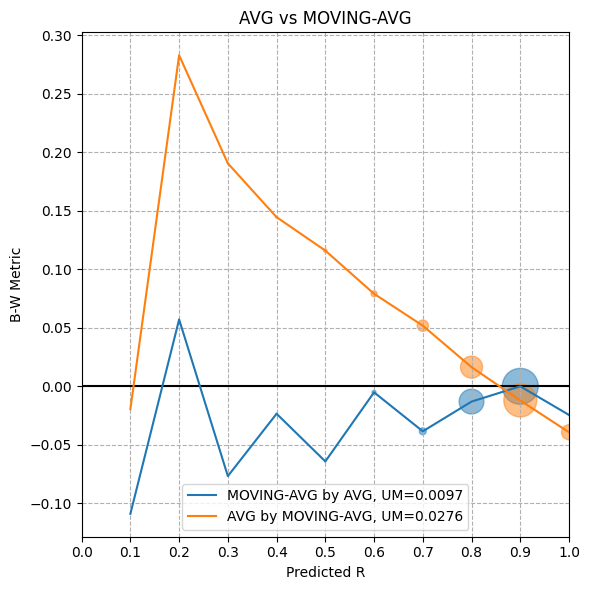

[{'FSRS-5_evaluated_by_FSRS-6': 0.0538, 'FSRS-6_evaluated_by_FSRS-5': 0.0271},
 {'FSRS-4.5_evaluated_by_FSRS-6': 0.0521,
  'FSRS-6_evaluated_by_FSRS-4.5': 0.0262},
 {'FSRSv4_evaluated_by_FSRS-6': 0.0649, 'FSRS-6_evaluated_by_FSRSv4': 0.0294},
 {'FSRSv3_evaluated_by_FSRS-6': 0.0552, 'FSRS-6_evaluated_by_FSRSv3': 0.0334},
 {'SM-17_evaluated_by_FSRS-6': 0.0461, 'FSRS-6_evaluated_by_SM-17': 0.0265},
 {'SM-16_evaluated_by_FSRS-6': 0.0305, 'FSRS-6_evaluated_by_SM-16': 0.0157},
 {'AVG_evaluated_by_FSRS-6': 0.0657, 'FSRS-6_evaluated_by_AVG': 0.0176},
 {'MOVING-AVG_evaluated_by_FSRS-6': 0.0546,
  'FSRS-6_evaluated_by_MOVING-AVG': 0.0309},
 {'FSRS-4.5_evaluated_by_FSRS-5': 0.073,
  'FSRS-5_evaluated_by_FSRS-4.5': 0.0737},
 {'FSRSv4_evaluated_by_FSRS-5': 0.0934, 'FSRS-5_evaluated_by_FSRSv4': 0.0806},
 {'FSRSv3_evaluated_by_FSRS-5': 0.0876, 'FSRS-5_evaluated_by_FSRSv3': 0.0824},
 {'SM-17_evaluated_by_FSRS-5': 0.0448, 'FSRS-5_evaluated_by_SM-17': 0.0366},
 {'SM-16_evaluated_by_FSRS-5': 0.023, 'FSRS

In [3]:
from utils import cross_comparison
import itertools

results = []

all_algorithms = ["FSRS-6", "FSRS-5", "FSRS-4.5", "FSRSv4", "FSRSv3", "SM-17", "SM-16", "AVG", "MOVING-AVG"]

for player, referee in itertools.combinations(all_algorithms, 2):
    results.append(cross_comparison(df, player, referee))
results

In [4]:
import numpy as np

final_results = {}

for player in all_algorithms:
    universal_metrics = []
    for result in results:
        for key, value in result.items():
            if key.startswith(player):
                universal_metrics.append(value)
    final_results[player] = np.array(universal_metrics).mean().round(4)

# Sort by value (ascending, lower is better)
sorted_results = sorted(final_results.items(), key=lambda x: x[1])

# Display result in markdown table format, bold the best algorithm and its metric
print("| Algorithm | Universal Metric↓ |")
print("|-----------|------------------|")
for i, (algo, metric) in enumerate(sorted_results):
    if i == 0:
        print(f"| **{algo}** | **{metric:.4f}** |")
    else:
        print(f"| {algo} | {metric:.4f} |")

| Algorithm | Universal Metric↓ |
|-----------|------------------|
| **FSRS-6** | **0.0258** |
| SM-16 | 0.0364 |
| SM-17 | 0.0390 |
| MOVING-AVG | 0.0400 |
| AVG | 0.0487 |
| FSRS-4.5 | 0.0527 |
| FSRS-5 | 0.0539 |
| FSRSv4 | 0.0659 |
| FSRSv3 | 0.0695 |
